### Time Series Analysis
- time series decomposition

In [1]:
import yfinance as yf
import matplotlib.pyplot as   plt

stock_data = yf.download('NVDA', start='2025-01-01')
stock_data.head(10)

/tmp/ipython-input-558725310.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('NVDA', start='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-01-02,138.287674,138.857589,134.608275,135.978049,198247200
2025-01-03,144.446686,144.876609,139.707445,139.987399,229322500
2025-01-06,149.405869,152.135439,147.796143,148.566008,265377400
2025-01-07,140.117371,153.105279,139.987387,153.005289,351782200
2025-01-08,140.087387,143.926764,137.537796,142.556990,227349900
2025-01-10,135.888077,139.897424,134.198347,137.427822,207602500
2025-01-13,133.208496,133.468464,129.489095,129.969029,204808900
2025-01-14,131.738724,136.357988,130.029008,136.028040,195590500


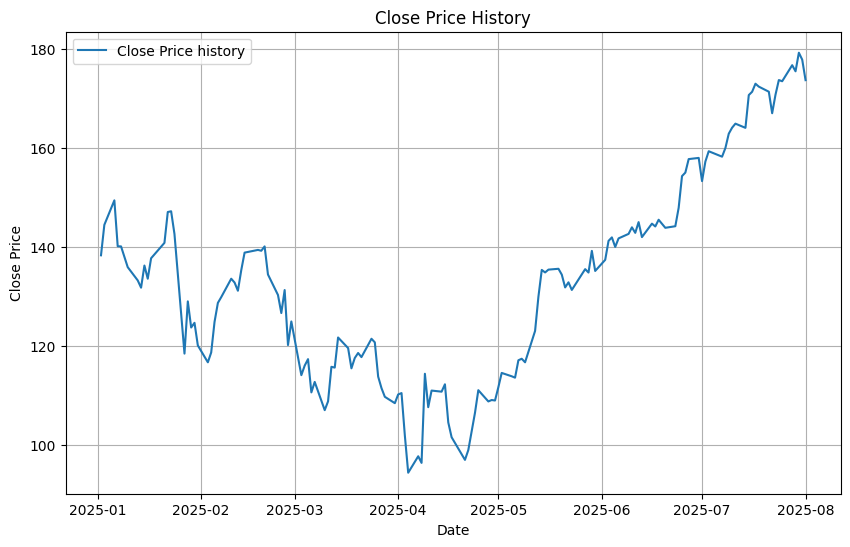

In [2]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### so we can see that, there is a increasing trend from MAY, onwards and the seasonal trend is not constant...so it means we can use multiplicative decomposition

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_multiplicative = seasonal_decompose(stock_data['Close'], model='multiplicative', period=30)

In [5]:
trend_multiplicative = decomposition_multiplicative.trend
seasonal_multiplicative = decomposition_multiplicative.seasonal
residual_multiplicative = decomposition_multiplicative.resid

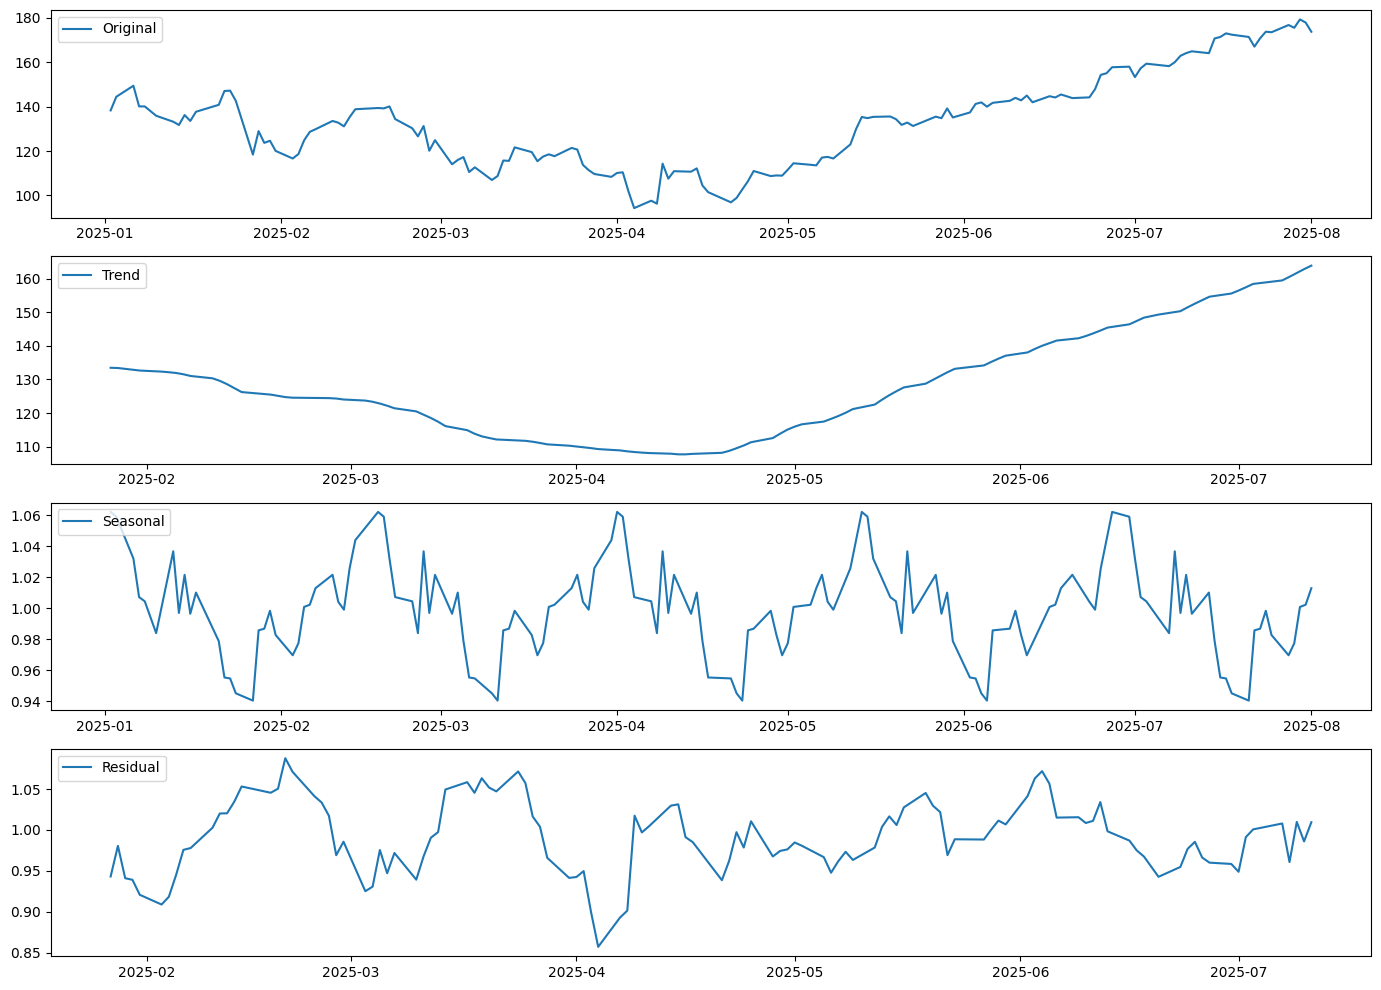

In [16]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_multiplicative, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_multiplicative, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_multiplicative, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()